# The *Mensa* dataset
This Python notebook serves as a starting point in analysing the UBT cafeterias sales for the past 7 years. We will start exploring the dataset to later build a regression model to predict coffee sales.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf


In [ ]:
# Read the Excel file into a pandas DataFrame

# When working in Colab, you can right click on the three dots next to the file and select the "Copy path" option
file_path = "/content/Heißgetränke Cafeteria BT 2017-09_2024_übermittelt.xlsx"
df = pd.read_excel(file_path)

In [ ]:
# Explore the data
df.head(5)  # Print the first 5 rows

,Satz,Kasse Nr.,Kasse,Kassenblatt Nr.,Trans Nr.,Datum Arbeitstag,TransPos. Nr.,Trans-Typ,Typ,VbGrp Nr.,...,Gebinde Nr.,Gebinde,Menge,E-Preis,G-Preis,Netto,Steuer,Steuer %,Pos-Status,Vk-Umsatzgruppe Nr.
0,1,8,Cafeteria BT Kasse 1,1,6,2017-01-09 07:50:02,2,Verkauf,Artikel,0,...,10723,Kaffee,1,0.9,0.9,0.9,0.0,0,-,303
1,2,8,Cafeteria BT Kasse 1,1,25,2017-01-09 07:55:30,2,Verkauf,Artikel,0,...,10723,Kaffee,1,0.9,0.9,0.9,0.0,0,-,303
2,3,8,Cafeteria BT Kasse 1,1,28,2017-01-09 07:56:13,1,Verkauf,Artikel,0,...,10723,Kaffee,1,0.9,0.9,0.9,0.0,0,-,303
3,4,8,Cafeteria BT Kasse 1,1,35,2017-01-09 07:58:03,2,Verkauf,Artikel,0,...,10723,Kaffee,1,0.9,0.9,0.9,0.0,0,-,303
4,5,8,Cafeteria BT Kasse 1,1,41,2017-01-09 08:00:48,3,Verkauf,Artikel,0,...,10722,Cappuccino/Milchkaffee,1,1.4,1.4,1.4,0.0,0,-,303


In [ ]:
df.info() # Print information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645084 entries, 0 to 645083
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Satz                 645084 non-null  int64         
 1   Kasse Nr.            645084 non-null  int64         
 2   Kasse                645084 non-null  object        
 3   Kassenblatt Nr.      645084 non-null  int64         
 4   Trans Nr.            645084 non-null  int64         
 5   Datum Arbeitstag     645084 non-null  datetime64[ns]
 6   TransPos. Nr.        645084 non-null  int64         
 7   Trans-Typ            645084 non-null  object        
 8   Typ                  645084 non-null  object        
 9   VbGrp Nr.            645084 non-null  int64         
 10  Verbrauchergruppe    645084 non-null  object        
 11  ZArt Nr.             645084 non-null  int64         
 12  Zahlungsart          645084 non-null  object        
 13  Verkaufsart   

In [ ]:
df.describe() # Print summary statistics

,Satz,Kasse Nr.,Kassenblatt Nr.,Trans Nr.,Datum Arbeitstag,TransPos. Nr.,VbGrp Nr.,ZArt Nr.,Beleg-Nr.,Artikel Nr.,Gebinde Nr.,Menge,E-Preis,G-Preis,Netto,Steuer,Steuer %,Vk-Umsatzgruppe Nr.
count,645084.000000,645084.000000,645084.000000,645084.000000,645084,645084.000000,645084.000000,645084.000000,6.450840e+05,645084.0,645084.000000,645084.000000,645084.000000,645084.000000,645084.000000,645084.000000,645084.000000,645084.0
mean,322542.500000,8.035922,679.396144,927.397651,2019-11-18 07:28:53.140017408,1.237273,0.198478,2.041057,2.021478e+09,4623.0,10748.128684,1.006763,1.159137,1.171862,1.161985,0.009878,0.935412,303.0
min,1.000000,8.000000,1.000000,1.000000,2017-01-09 07:50:02,1.000000,0.000000,1.000000,1.780000e+09,4623.0,10721.000000,-8.000000,0.000000,-11.900000,-11.120000,-0.780000,0.000000,303.0
25%,161271.750000,8.000000,288.000000,336.000000,2018-01-29 12:38:57.750000128,1.000000,0.000000,2.000000,1.880001e+09,4623.0,10722.000000,1.000000,0.900000,0.900000,0.900000,0.000000,0.000000,303.0
50%,322542.500000,8.000000,553.000000,819.000000,2019-03-01 10:17:02,1.000000,0.000000,2.000000,1.980002e+09,4623.0,10723.000000,1.000000,1.100000,1.100000,1.100000,0.000000,0.000000,303.0
75%,483813.250000,8.000000,1101.000000,1402.000000,2022-01-24 16:51:50.750000128,1.000000,0.000000,2.000000,2.280000e+09,4623.0,10723.000000,1.000000,1.500000,1.500000,1.500000,0.000000,0.000000,303.0
max,645084.000000,9.000000,1772.000000,4033.000000,2024-10-17 15:57:45,37.000000,5.000000,50.000000,2.480008e+09,4623.0,21543.000000,13.000000,2.200000,12.000000,11.210000,0.790000,7.000000,303.0
std,186219.854862,0.186097,493.996978,676.184594,NaN,0.681721,0.677115,1.403522,2.261405e+08,0.0,292.841402,0.358076,0.423076,0.603458,0.593403,0.032984,2.380641,0.0


                  Gebinde    G-Preis
0  Cappuccino/Milchkaffee  170106.75
1             Coffee Time  188943.70
2       Coffee Time 2,20€    1042.70
3                  Kaffee  350999.61
4              Kakao warm   18430.66
5                     Tee   23917.04
6               Teewasser    2509.20


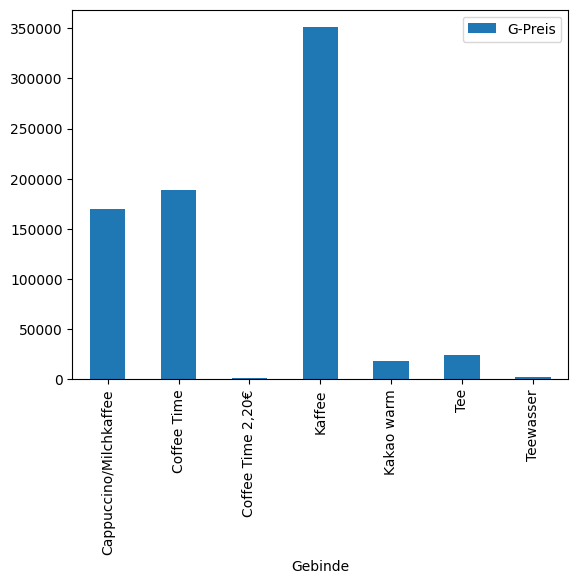

In [ ]:
# We can filter the data by a specific column
filtered_df = df[df['Gebinde'] == 'Kaffee']
# print(filtered_df)

# Group the data by a column and calculate summary statistics
grouped_df = df.groupby('Gebinde')['G-Preis'].sum().reset_index()
print(grouped_df)

# Visualize the data using Matplotlib or other plotting libraries
import matplotlib.pyplot as plt
grouped_df.plot(kind='bar', x='Gebinde', y='G-Preis')
plt.show()

In the column *Datum Arbeitstag* we can see the specific time of every transaction in datetime format.

In [ ]:
df["Datum Arbeitstag"]

,Datum Arbeitstag
0,2017-01-09 07:50:02
1,2017-01-09 07:55:30
2,2017-01-09 07:56:13
3,2017-01-09 07:58:03
4,2017-01-09 08:00:48
...,...
645079,2024-10-17 15:55:04
645080,2024-10-17 15:56:04
645081,2024-10-17 15:56:41
645082,2024-10-17 15:57:31


For now, we will just focus on the Kaffee sales:

In [ ]:
df_coffee = df[df['Gebinde'] == 'Kaffee']
print(df_coffee.head(3))
print("This subset has dimension " + str(df_coffee.shape))

   Satz  Kasse Nr.                 Kasse  Kassenblatt Nr.  Trans Nr.  \
0     1          8  Cafeteria BT Kasse 1                1          6   
1     2          8  Cafeteria BT Kasse 1                1         25   
2     3          8  Cafeteria BT Kasse 1                1         28   

     Datum Arbeitstag  TransPos. Nr. Trans-Typ      Typ  VbGrp Nr.  ...  \
0 2017-01-09 07:50:02              2   Verkauf  Artikel          0  ...   
1 2017-01-09 07:55:30              2   Verkauf  Artikel          0  ...   
2 2017-01-09 07:56:13              1   Verkauf  Artikel          0  ...   

  Gebinde Nr.  Gebinde Menge E-Preis  G-Preis  Netto Steuer  Steuer %  \
0       10723   Kaffee     1     0.9      0.9    0.9    0.0         0   
1       10723   Kaffee     1     0.9      0.9    0.9    0.0         0   
2       10723   Kaffee     1     0.9      0.9    0.9    0.0         0   

  Pos-Status  Vk-Umsatzgruppe Nr.  
0          -                  303  
1          -                  303  
2        

Instead of timestamps, we will group sales by day using the *groupby* operation and *freq=D* as the grouper key, where *D* is used to group by day.

In [ ]:
df_coffee_by_day = df_coffee.groupby(pd.Grouper(key='Datum Arbeitstag', freq='D')).sum()
print(df_coffee_by_day.head(3))
print("This subset has dimension " + str(df_coffee_by_day.shape))

                    Satz  Kasse Nr.  \
Datum Arbeitstag                      
2017-01-09        144314       3369   
2017-01-10        497535       3557   
2017-01-11        859979       3560   

                                                              Kasse  \
Datum Arbeitstag                                                      
2017-01-09        Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...   
2017-01-10        Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...   
2017-01-11        Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...   

                  Kassenblatt Nr.  Trans Nr.  TransPos. Nr.  \
Datum Arbeitstag                                              
2017-01-09                    415     413823            547   
2017-01-10                    833     480112            548   
2017-01-11                   1269     458096            524   

                                                          Trans-Typ  \
Datum Arbeitstag                                             

Now, we can see the plot of coffee sales (where the column *Menge* = amount) by day.

<Axes: xlabel='Datum Arbeitstag'>

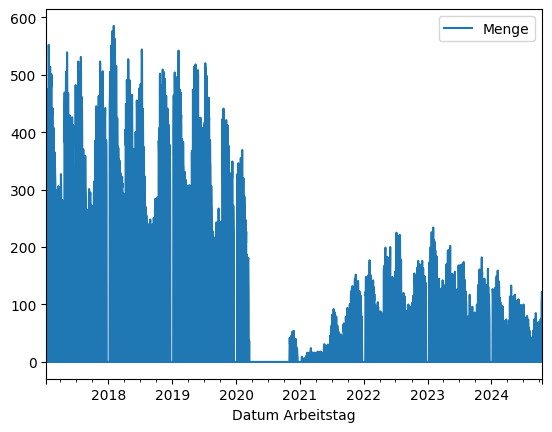

In [ ]:
df_coffee_by_day.plot(y="Menge")

In [ ]:
df_coffee_by_day.reset_index(inplace=True) # Resetting index, we go back to having 27 columns
print(df_coffee_by_day.head(8)) # Notice how sales only go from Monday to Friday

  Datum Arbeitstag     Satz  Kasse Nr.  \
0       2017-01-09   144314       3369   
1       2017-01-10   497535       3557   
2       2017-01-11   859979       3560   
3       2017-01-12  1093261       3179   
4       2017-01-13   974204       2259   
5       2017-01-14        0          0   
6       2017-01-15        0          0   
7       2017-01-16  1902097       3755   

                                               Kasse  Kassenblatt Nr.  \
0  Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...              415   
1  Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...              833   
2  Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...             1269   
3  Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...             1525   
4  Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...             1407   
5                                                  0                0   
6                                                  0                0   
7  Cafeteria BT Kasse 1Cafeteria BT K

Seasonal behaviour from the previous plot and sales trend over the week led us to believe that the day of the week and current month would let us capture seasonality. The latter is relevant as it captures the lecture and no-lecture periods, and the average weather conditions, in a single feature.

In [ ]:
# Extract day of the week and month
df_coffee_by_day['day_of_week'] = df_coffee_by_day['Datum Arbeitstag'].dt.day_name()  # e.g., Monday, Tuesday, etc.
df_coffee_by_day['month'] = df_coffee_by_day['Datum Arbeitstag'].dt.month_name()      # e.g., January, February, etc.

Now, we start encoding the features (we create a function for this first). This is the start of the ML pipeline.


In [ ]:
def encode_df(dataframe):
    le = LabelEncoder()
    for column in dataframe.columns:
        dataframe[column] = le.fit_transform(dataframe[column])
    return dataframe

In [ ]:
df_features = df_coffee_by_day[['day_of_week', 'month', 'Menge']] # create a dataframe for our features
df_features.head(15) # let's take a look at the first 15 rows

,day_of_week,month,Menge
0,Monday,January,426
1,Tuesday,January,447
2,Wednesday,January,455
3,Thursday,January,411
4,Friday,January,289
5,Saturday,January,0
6,Sunday,January,0
7,Monday,January,475
8,Tuesday,January,475
9,Wednesday,January,440


However, we must convert our text labels to integers.

Note: This next snippet of code was AI-generated using the term *Integer Encoding for day and month* in the prompt.

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_day_month(dataframe):
  le_day = LabelEncoder()
  le_month = LabelEncoder()

  dataframe['day_of_week_encoded'] = le_day.fit_transform(dataframe['day_of_week'])
  dataframe['month_encoded'] = le_month.fit_transform(dataframe['month'])

  return dataframe

df_coffee_by_day = encode_day_month(df_coffee_by_day)
df_coffee_by_day.head(15)

,Datum Arbeitstag,Satz,Kasse Nr.,Kasse,Kassenblatt Nr.,Trans Nr.,TransPos. Nr.,Trans-Typ,Typ,VbGrp Nr.,...,G-Preis,Netto,Steuer,Steuer %,Pos-Status,Vk-Umsatzgruppe Nr.,day_of_week,month,day_of_week_encoded,month_encoded
0,2017-01-09,144314,3369,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,415,413823,547,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,107,...,383.4,380.82,2.58,343,----------------------------------------------...,125745,Monday,January,1,4
1,2017-01-10,497535,3557,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,833,480112,548,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,60,...,402.3,399.78,2.52,294,----------------------------------------------...,133017,Tuesday,January,5,4
2,2017-01-11,859979,3560,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,1269,458096,524,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,68,...,409.5,406.62,2.88,294,----------------------------------------------...,133017,Wednesday,January,6,4
3,2017-01-12,1093261,3179,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,1525,394886,487,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,50,...,369.9,367.86,2.04,252,----------------------------------------------...,118776,Thursday,January,4,4
4,2017-01-13,974204,2259,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,1407,254075,351,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,29,...,260.1,258.60,1.50,189,----------------------------------------------...,85446,Friday,January,0,4
5,2017-01-14,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.00,0,0,0,Saturday,January,2,4
6,2017-01-15,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.00,0,0,0,Sunday,January,3,4
7,2017-01-16,1902097,3755,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,2699,448351,559,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,51,...,427.5,425.22,2.28,259,--------+StS+StS+StP--------------------------...,139683,Monday,January,1,4
8,2017-01-17,2306301,3765,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,3180,452333,598,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,45,...,427.5,425.46,2.04,245,---+StS+StS+StP----------------------+StS+StS+...,140289,Tuesday,January,5,4
9,2017-01-18,2581039,3567,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,3489,474786,559,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,40,...,396.0,393.78,2.22,308,----------------------------------------------...,133623,Wednesday,January,6,4


The last two columns correspond to the day of the week and month already encoded as integer labels. Now we can start creating our regression model with day and month as input features and *Menge*/amount of sales as output.

In [ ]:
X = df_coffee_by_day[['day_of_week_encoded', 'month_encoded']]
y = df_coffee_by_day['Menge']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Mean Absolute Error:', mae)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 35837.9336 - mae: 119.9349 - val_loss: 24242.1797 - val_mae: 109.9703
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 23248.7969 - mae: 117.6467 - val_loss: 22303.9727 - val_mae: 119.4923
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23089.9766 - mae: 123.4124 - val_loss: 21877.4629 - val_mae: 114.8060
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 22707.4414 - mae: 120.6206 - val_loss: 21698.2324 - val_mae: 114.6099
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22391.0332 - mae: 120.3711 - val_loss: 21495.8105 - val_mae: 115.7270
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22629.2051 - mae: 122.4519 - val_loss: 21322.5117 - val_mae: 114.1915
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 22411.6816 - mae: 120.6016 - val_loss: 21129.7578 - val_mae: 112.3015
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22224.7520 - mae: 119.9311 - val_l

After training, we can also plot the training and validation loss as well as the Mean Absolute Error  or MAE. The latter represents the magnitude of difference between the prediction of an observation and the true value of that observation.

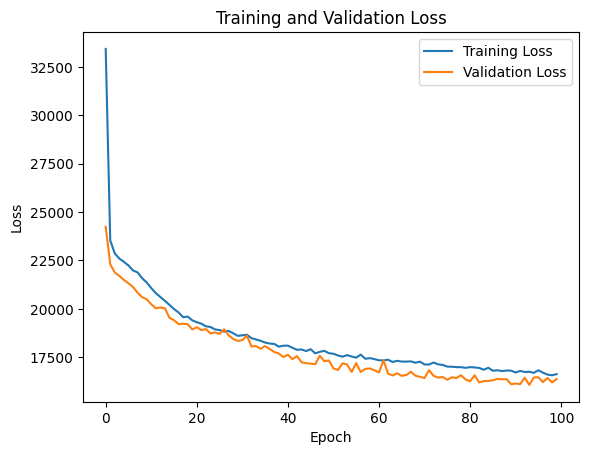

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

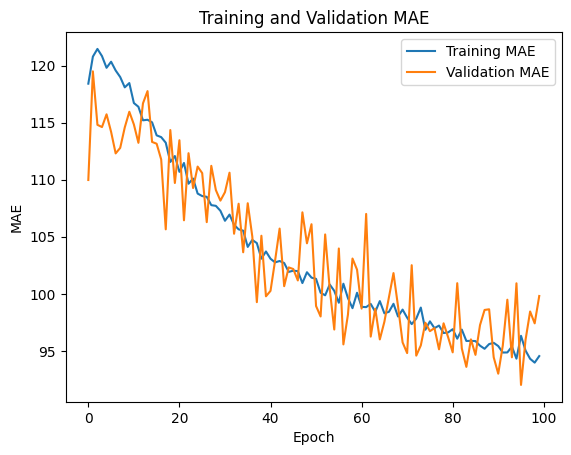

In [ ]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

We can see the model improving over epochs, but the error is still too high to make accurate predictions. How can we improve the model?

Following the previous pipeline, we could also add more features and see what works best. We could, for example, add a feature encoding the year or whether we are in pre- during or post covid period.

In [ ]:
# Feature engineering function to be extended by students
def create_features(dataframe):
    # Base features
    dataframe['day_of_week'] = dataframe['Datum Arbeitstag'].dt.day_name()
    dataframe['month'] = dataframe['Datum Arbeitstag'].dt.month_name()
    dataframe['year'] = dataframe['Datum Arbeitstag'].dt.year

    # COVID-19 period feature (example of possible feature engineering)
    dataframe['covid_period'] = np.where(
    (dataframe['Datum Arbeitstag'] < '2020-03-01'), -1,
    np.where(
        (dataframe['Datum Arbeitstag'] >= '2020-03-01') &
        (dataframe['Datum Arbeitstag'] <= '2022-03-01'), 0,
        1)
    )

    # Encode categorical features
    le_day = LabelEncoder()
    le_month = LabelEncoder()
    dataframe['day_of_week_encoded'] = le_day.fit_transform(dataframe['day_of_week'])
    dataframe['month_encoded'] = le_month.fit_transform(dataframe['month'])

    return dataframe

In [ ]:
# Apply feature engineering
df_coffee_by_day = create_features(df_coffee_by_day)

In [ ]:
df_coffee_by_day.head(15)

,Datum Arbeitstag,Satz,Kasse Nr.,Kasse,Kassenblatt Nr.,Trans Nr.,TransPos. Nr.,Trans-Typ,Typ,VbGrp Nr.,...,Steuer,Steuer %,Pos-Status,Vk-Umsatzgruppe Nr.,day_of_week,month,day_of_week_encoded,month_encoded,year,covid_period
0,2017-01-09,144314,3369,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,415,413823,547,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,107,...,2.58,343,----------------------------------------------...,125745,Monday,January,1,4,2017,-1
1,2017-01-10,497535,3557,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,833,480112,548,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,60,...,2.52,294,----------------------------------------------...,133017,Tuesday,January,5,4,2017,-1
2,2017-01-11,859979,3560,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,1269,458096,524,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,68,...,2.88,294,----------------------------------------------...,133017,Wednesday,January,6,4,2017,-1
3,2017-01-12,1093261,3179,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,1525,394886,487,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,50,...,2.04,252,----------------------------------------------...,118776,Thursday,January,4,4,2017,-1
4,2017-01-13,974204,2259,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,1407,254075,351,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,29,...,1.50,189,----------------------------------------------...,85446,Friday,January,0,4,2017,-1
5,2017-01-14,0,0,0,0,0,0,0,0,0,...,0.00,0,0,0,Saturday,January,2,4,2017,-1
6,2017-01-15,0,0,0,0,0,0,0,0,0,...,0.00,0,0,0,Sunday,January,3,4,2017,-1
7,2017-01-16,1902097,3755,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,2699,448351,559,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,51,...,2.28,259,--------+StS+StS+StP--------------------------...,139683,Monday,January,1,4,2017,-1
8,2017-01-17,2306301,3765,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,3180,452333,598,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,45,...,2.04,245,---+StS+StS+StP----------------------+StS+StS+...,140289,Tuesday,January,5,4,2017,-1
9,2017-01-18,2581039,3567,Cafeteria BT Kasse 1Cafeteria BT Kasse 1Cafete...,3489,474786,559,VerkaufVerkaufVerkaufVerkaufVerkaufVerkaufVerk...,ArtikelArtikelArtikelArtikelArtikelArtikelArti...,40,...,2.22,308,----------------------------------------------...,133623,Wednesday,January,6,4,2017,-1


Another way to improve the model would be, for instance, with different layer configurations and learning rates.

In [ ]:
# You could start trying exploring over:

feature_combinations = [
    ['day_of_week_encoded', 'month_encoded'],
    ['day_of_week_encoded', 'month_encoded', 'covid_period'],
    ['day_of_week_encoded', 'month_encoded', 'year']
]

layer_configs = [
    [64, 32, 16],
    [128, 64, 32],
    [256, 128, 64]
]

learning_rates = [0.001, 0.01, 0.0001]